In [2]:
import os
import PyPDF2
import fitz
import pandas as pd

In [3]:
from nltk import tokenize
# import nltk
# nltk.download('punkt')

In [4]:
dir = 'annoted_sustainability_reports/Healthcare'
 

### Extracting Sentences

In [38]:
# aggregated sentences per report
highlighted_num = []
highlighted_sentences = [] 
all_sentences = []
highlighted_label = []
all_label = []

# aggregated sentences of the entire industry (tokenizing highlighted_result & all_result)
rel_text = []
rel_label = []
all_text_final = []


# labels used to keep the order of sentences by company names 
x_label = ["EliLilly", "UnitedHealthGroup", "Merck", "BristolMyersSquibb", "Danaher", "johnsonandjohnson", 
            "Pfizer", "Abbott", "ThermoFisherScientifiic", "Amgen"]


for file in os.listdir(dir): # running all the files in the industry folder
    f = os.path.join(dir, file) # joining filename and directory
    print(f)
    
    # labelling sentences by companies 
    res = list(filter(lambda x:  x in f, x_label))

    doc = fitz.open(f) # opening each company report
    print(doc)
    
    # results of each report
    highlighted_result = []
    all_result = [] 
    
    # Iterate each page of the document 
    for page in doc:
        
        # extract all the sentences in pdf 
        test = page.get_text()
        all_result.append(test)
        
        # extracting highlighted sentences from pdf 
        highlights = []
        annot = page.first_annot
        
        while annot:
            if annot.type[0] == 8:
                all_coordinates = annot.vertices
                try:
                    if len(all_coordinates) == 4:
                        highlight_coord = fitz.Quad(all_coordinates).rect
                        highlights.append(highlight_coord)
                    else:
                        all_coordinates = [all_coordinates[x:x+4] for x in range(0, len(all_coordinates), 4)]
                        for i in range(0,len(all_coordinates)):
                            coord = fitz.Quad(all_coordinates[i]).rect
                            highlights.append(coord)
                except:
                    print("NoneType found")
            annot = annot.next
        
        # calculate coordinate sum to eliminate duplicated sentences 
        coordinate_sum_total = []
        all_words = page.get_text_words()
        highlight_text = []
        if len(highlights) > 0:
            for h in highlights:
                sentence = []
                for w in all_words:
                    sent_pos = 0
                    if (fitz.Rect(w[0:4]).intersects(h)):
                        if str(sum(w[0:4])) not in coordinate_sum_total: #if no duplicate coordinate sum found, append
                            coordinate_sum_total.append(str(sum(w[0:4])))
                            test_pos = int(str("%02d" % w[5]) + str("%02d" % w[6]) + str("%02d" % w[7]))
                            if test_pos > sent_pos:
                                sent_pos = test_pos
                                sentence.append(w[4])
                            
        
                highlight_text.append(" ".join(sentence))
        
#         print(highlight_text)
        
        if len(highlight_text) > 0:
            highlighted_result.append(" ".join(highlight_text))
        
#         print(highlighted_result)

    # Results of the entire industry & keeps track of number of sentences in highlighted_num
    highlighted_num.append(len(highlighted_result))
    highlighted_sentences.append(highlighted_result)
    all_sentences.append(all_result)
    
    print(len(highlighted_result))
    
#         print(test_text)
        
    for r in highlighted_result:
        if r is not None:
            # tokenize sentences by pages where the sentences is found 
            # instead of conducting it to the entire report this enhances accuracy 
            rel_text += tokenize.sent_tokenize(r)
            highlighted_label.append(res)
            rel_label += res * len(tokenize.sent_tokenize(r))         
    
    for i in all_result:
        all_text_final += tokenize.sent_tokenize(i.replace("\n", " "))
        all_label += res * len(tokenize.sent_tokenize(i.replace("\n", " ")))
        
#     print(highlighted_sentences, "\n", len(highlighted_sentences))



annoted_sustainability_reports/Healthcare/EliLilly_2021_Environmental_ESG_report.pdf
Document('annoted_sustainability_reports/Healthcare/EliLilly_2021_Environmental_ESG_report.pdf')
5
annoted_sustainability_reports/Healthcare/UnitedHealthGroup_2021-sustainability-report.pdf
Document('annoted_sustainability_reports/Healthcare/UnitedHealthGroup_2021-sustainability-report.pdf')
0
annoted_sustainability_reports/Healthcare/Merck_2021_ESG_report.pdf
Document('annoted_sustainability_reports/Healthcare/Merck_2021_ESG_report.pdf')
6
annoted_sustainability_reports/Healthcare/BristolMyersSquibb_2020_ESG.pdf
Document('annoted_sustainability_reports/Healthcare/BristolMyersSquibb_2020_ESG.pdf')
3
annoted_sustainability_reports/Healthcare/Danaher_2021_sustainability_report.pdf
Document('annoted_sustainability_reports/Healthcare/Danaher_2021_sustainability_report.pdf')
2
annoted_sustainability_reports/Healthcare/johnsonandjohnson_2021-health-for-humanity-report-pdf.pdf
Document('annoted_sustainability

In [5]:
highlighted_num

[5, 0, 6, 3, 2, 5, 1, 4, 4, 4]

In [39]:
rel_text_df = pd.DataFrame([rel_text, rel_label]).transpose()
rel_text_df = rel_text_df.rename(columns = {0: 'relevant_sentences', 1: 'company_label'})
rel_text_df

,relevant_sentences,company_label
0,"From 2012 to 2020, we achieved a 26% reduction...",EliLilly
1,"In 2021, we achieved a 9% absolute emissions r...",EliLilly
2,This reduction was partially driven by energy ...,EliLilly
3,"In 2021, 9.6% of our purchased electricity cam...",EliLilly
4,A large portion of this renewable electricity ...,EliLilly
...,...,...
67,Renewable electricity (% of total electricity)...,ThermoFisherScientifiic
68,Through innovative manufacturing technologies ...,Amgen
69,"“It Nevertheless, as of January 1, 2022, Barre...",Amgen
70,"ENERGY In 2021, we increased the amount of ren...",Amgen


In [40]:
all_text_final_df = pd.DataFrame([all_text_final, all_label]).transpose()
all_text_final_df = all_text_final_df.rename(columns = {0: 'all_sentences', 1: 'company_label'})
all_text_final_df

,all_sentences,company_label
0,"7/7/22, 10:29 AM Environmental | 2021 ESG Repo...",EliLilly
1,Making medicines requires the use of valuable ...,EliLilly
2,We’re committed to reducing our environmental ...,EliLilly
3,"To track our progress, we measure and manage e...",EliLilly
4,"Lilly manages health, safety and the environme...",EliLilly
...,...,...
12157,Global economic conditions may magnify certai...,Amgen
12158,Our business performance could affect or limi...,Amgen
12159,We may not be able to access the capital and ...,Amgen
12160,Reference to our website is not intended to fu...,Amgen


### Getting Sentence Statistics 

In [41]:
# count rel sentences 
rel_count = rel_text_df.groupby('company_label', sort = False).count()

# count all sentences
sent_count = all_text_final_df.groupby('company_label', sort = False).count()

In [42]:
sentences_list = []
rel_sent_list = []

final_text_stat = pd.concat([sent_count, rel_count],  sort = False, axis = 1)

[rel_sent_list.append(rel_sent) for rel_sent in final_text_stat['relevant_sentences']]    
[sentences_list.append(all_sent) for all_sent in final_text_stat['all_sentences']]    
    
final_text_stat['relevant_sentences'] = final_text_stat['relevant_sentences'].fillna(0)
final_text_stat['percentages'] = final_text_stat['relevant_sentences'] / final_text_stat['all_sentences'] * 100
final_text_stat

,all_sentences,relevant_sentences,percentages
company_label,,,
EliLilly,105,16.0,15.238095
UnitedHealthGroup,1065,0.0,0.000000
Merck,2464,13.0,0.527597
BristolMyersSquibb,1211,5.0,0.412882
Danaher,945,2.0,0.211640
johnsonandjohnson,2118,14.0,0.661001
Pfizer,59,1.0,1.694915
Abbott,2141,10.0,0.467071
ThermoFisherScientifiic,921,7.0,0.760043


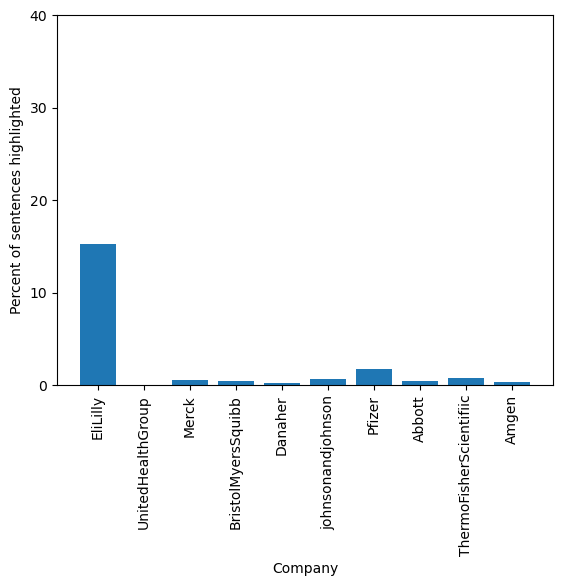

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import glob
y = []

x = ["EliLilly", "UnitedHealthGroup", "Merck", "BristolMyersSquibb", "Danaher", "johnsonandjohnson", 
     "Pfizer", "Abbott", "ThermoFisherScientifiic", "Amgen"]

i = 0

for file in os.listdir(dir):
    y.append(100 * (rel_sent_list[i])/sentences_list[i])
    i = i+1

plt.bar(x, y, width = 0.8)
plt.xticks(rotation='vertical')
plt.xlabel("Company")
plt.ylabel("Percent of sentences highlighted")
plt.yticks(np.arange(0, 50, 10))
plt.show()

In [44]:
import pandas as pd

series = pd.Series(y)
series.describe()

count     9.000000
mean      2.258477
std       4.886420
min       0.211640
25%       0.412882
50%       0.527597
75%       0.760043
max      15.238095
dtype: float64

### Exporting and Saving Files 

In [12]:
#storing variable so they can be called between notebooks (for ML and aggregate work later on)

HC_reltext = rel_text_df
HC_alltext = all_text_final_df
HC_stat = final_text_stat

%store HC_reltext
%store HC_alltext
%store HC_stat

Stored 'HC_reltext' (DataFrame)
Stored 'HC_alltext' (DataFrame)
Stored 'HC_stat' (DataFrame)
